In [6]:
import zipfile

filename ='/Users/ericchiyembekeza/Desktop/Lambda School/DS-Unit-2-Applied-Modeling/module3-hyperparamter-optimization/caterpillar-tube-pricing.zip'

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [9]:
# Import data
# Set source

SOURCE = '/Users/ericchiyembekeza/Desktop/Lambda School/DS-Unit-2-Applied-Modeling/module3-hyperparamter-optimization/competition_data/'

In [10]:
import os
import pandas as pd

materials = pd.read_csv(os.path.join(SOURCE + 'bill_of_materials.csv'))
materials.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
components = pd.read_csv(os.path.join(SOURCE + 'components.csv'))
components.head()

,component_id,name,component_type_id
0,9999,OTHER,OTHER
1,C-0001,SLEEVE,CP-024
2,C-0002,SLEEVE,CP-024
3,C-0003,SLEEVE-FLARED,CP-024
4,C-0004,NUT,CP-026


In [12]:
#list of component ids
import pandas as pd

assembly_components = materials.melt(id_vars='tube_assembly_id',
                                    value_vars = [f'component_id_{n}' for n in range(1,9)])
assembly_components = (assembly_components
                      .sort_values(by='tube_assembly_id')
                      .dropna()
                      .rename(columns = {'value': 'component_id'}))

assembly_components.head()

,tube_assembly_id,variable,component_id
0,TA-00001,component_id_1,C-1622
21198,TA-00001,component_id_2,C-1629
1,TA-00002,component_id_1,C-1312
2,TA-00003,component_id_1,C-1312
3,TA-00004,component_id_1,C-1312


In [13]:
#merge with component types

assembly_component_types = assembly_components.merge(components, how = 'left')
assembly_component_types.head()

,tube_assembly_id,variable,component_id,name,component_type_id
0,TA-00001,component_id_1,C-1622,NUT-SWIVEL,CP-025
1,TA-00001,component_id_2,C-1629,SLEEVE-ORFS,CP-024
2,TA-00002,component_id_1,C-1312,NUT-FLARED,CP-028
3,TA-00003,component_id_1,C-1312,NUT-FLARED,CP-028
4,TA-00004,component_id_1,C-1312,NUT-FLARED,CP-028


In [14]:
table = pd.crosstab(assembly_component_types['tube_assembly_id'],
                   assembly_component_types['component_type_id'])

table = table.reset_index()
table.columns.name = ''
print(table.shape)
table.head()

(19149, 30)


,tube_assembly_id,CP-001,CP-002,CP-003,CP-004,CP-005,CP-006,CP-007,CP-008,CP-009,...,CP-021,CP-022,CP-023,CP-024,CP-025,CP-026,CP-027,CP-028,CP-029,OTHER
0,TA-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,TA-00002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,TA-00003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,TA-00004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,TA-00005,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [15]:
#check for "weight" in component files

from glob import glob

def search_column(name):
    for path in glob(os.path.join(SOURCE + '*.csv')):
        df = pd.read_csv(path)
        if name in df.columns:
            print(path, df.shape)
            print(df.columns.tolist(), '\n')
            
search_column('weight')

/Users/ericchiyembekeza/Desktop/Lambda School/DS-Unit-2-Applied-Modeling/module3-hyperparamter-optimization/competition_data/comp_threaded.csv (194, 32)
['component_id', 'component_type_id', 'adaptor_angle', 'overall_length', 'hex_size', 'end_form_id_1', 'connection_type_id_1', 'length_1', 'thread_size_1', 'thread_pitch_1', 'nominal_size_1', 'end_form_id_2', 'connection_type_id_2', 'length_2', 'thread_size_2', 'thread_pitch_2', 'nominal_size_2', 'end_form_id_3', 'connection_type_id_3', 'length_3', 'thread_size_3', 'thread_pitch_3', 'nominal_size_3', 'end_form_id_4', 'connection_type_id_4', 'length_4', 'thread_size_4', 'thread_pitch_4', 'nominal_size_4', 'unique_feature', 'orientation', 'weight'] 

/Users/ericchiyembekeza/Desktop/Lambda School/DS-Unit-2-Applied-Modeling/module3-hyperparamter-optimization/competition_data/comp_adaptor.csv (25, 20)
['component_id', 'component_type_id', 'adaptor_angle', 'overall_length', 'end_form_id_1', 'connection_type_id_1', 'length_1', 'thread_size_1',

In [16]:
#check for "orientation" and "unique_feature"

comp_threaded = pd.read_csv(os.path.join(SOURCE + 'comp_threaded.csv'))
comp_threaded['orientation'].value_counts()

No     121
Yes     73
Name: orientation, dtype: int64

In [17]:
comp_threaded['unique_feature'].value_counts()

No     161
Yes     33
Name: unique_feature, dtype: int64

In [18]:
#read all files and concat together

item = (pd.read_csv(path) for path in glob(os.path.join(SOURCE + 'comp_*.csv')))
comp = pd.concat(item, sort=False)

columns = ['component_id', 'component_type_id', 'orientation', 'unique_feature', 'weight']
comp = comp[columns]

comp['orientation'] = (comp['orientation'] == 'Yes').astype(int)
comp['unique_feature'] = (comp['unique_feature'] == 'Yes').astype(int)
comp['weight'] = comp['weight'].fillna(comp['weight'].median())

comp.head()

,component_id,component_type_id,orientation,unique_feature,weight
0,C-0007,CP-014,0,0,0.028
1,C-0030,CP-015,1,0,0.914
2,C-0041,CP-014,0,0,0.120
3,C-0043,CP-014,0,0,0.090
4,C-0044,CP-014,0,0,0.182


In [19]:
materials['components_total'] = sum(materials[f'quantity_{n}'].fillna(0) for n in range(1,9))
materials['components_distinct'] = sum(materials[f'component_id_{n}'].notnull().astype(int) for n in range(1,9))
materials['orientation'] = 0
materials['unique_feature'] = 0
materials['weight'] = 0

for n in range(1,9):
    materials = materials.merge(comp, left_on = f'component_id_{n}', right_on = 'component_id',
                               how = 'left', suffixes = ('', f'_{n}'))
    
for col in materials:
    if 'orientation' in col or 'unique_feature' in col or 'weight' in col:
        materials[col] = materials[col].fillna(0)
    
materials['orientation'] = sum(materials[f'orientation_{n}'] for n in range(1,9))
materials['unique_feature'] = sum(materials[f'unique_feature_{n}'] for n in range(1,9))
materials['weight'] = sum(materials[f'weight_{n}'] for n in range(1,9))

materials.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,...,component_id_7,component_type_id_7,orientation_7,unique_feature_7,weight_7,component_id_8,component_type_id_8,orientation_8,unique_feature_8,weight_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0


In [20]:
features = ['tube_assembly_id', 'orientation', 'unique_feature', 'weight',
           'components_total', 'components_distinct', 'component_id_1']
materials = materials[features]

print(materials.shape)
materials.head()

(21198, 7)


,tube_assembly_id,orientation,unique_feature,weight,components_total,components_distinct,component_id_1
0,TA-00001,0.0,1.0,0.048,4.0,2,C-1622
1,TA-00002,0.0,0.0,0.009,2.0,1,C-1312
2,TA-00003,0.0,0.0,0.009,2.0,1,C-1312
3,TA-00004,0.0,0.0,0.009,2.0,1,C-1312
4,TA-00005,0.0,1.0,0.210,3.0,3,C-1624


In [21]:
#read tube data

tube = pd.read_csv(os.path.join(SOURCE + 'tube.csv'))
tube.head()

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164.0,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [22]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true,y_pred))

def wrangle(X):
    x = X.copy()
    
    # Engineer date features
    x['quote_date'] = pd.to_datetime(x['quote_date'], infer_datetime_format=True)
    x['quote_date_year'] = x['quote_date'].dt.year
    x['quote_date_month'] = x['quote_date'].dt.month
    x = x.drop(columns='quote_date')
    
    # Merge tube data
    tube = pd.read_csv(SOURCE + 'tube.csv')
    x = x.merge(tube, how='left')
    
    # Engineer features from bill_of_materials
    materials = pd.read_csv(SOURCE + 'bill_of_materials.csv')
    
    materials['components_total'] = (materials['quantity_1'].fillna(0) + 
                                     materials['quantity_2'].fillna(0) + 
                                     materials['quantity_3'].fillna(0) + 
                                     materials['quantity_4'].fillna(0) + 
                                     materials['quantity_5'].fillna(0) + 
                                     materials['quantity_6'].fillna(0) + 
                                     materials['quantity_7'].fillna(0) + 
                                     materials['quantity_8'].fillna(0))

    materials['components_distinct'] = (materials['component_id_1'].notnull().astype(int) + 
                                        materials['component_id_2'].notnull().astype(int) + 
                                        materials['component_id_3'].notnull().astype(int) + 
                                        materials['component_id_4'].notnull().astype(int) + 
                                        materials['component_id_5'].notnull().astype(int) + 
                                        materials['component_id_6'].notnull().astype(int) + 
                                        materials['component_id_7'].notnull().astype(int) + 
                                        materials['component_id_8'].notnull().astype(int))
    
    # Merge selected features from bill_of_materials
    # Just use the first component_id, ignore the others for now!
    features = ['tube_assembly_id', 'component_id_1', 'components_total', 'components_distinct']
    x = x.merge(materials[features], how='left')
    
    # Get component_type_id (has lower cardinality than component_id)
    components = pd.read_csv(SOURCE + 'components.csv')
    components = components.rename(columns={'component_id': 'component_id_1'})
    features = ['component_id_1', 'component_type_id']
    x = x.merge(components[features], how='left')
    
    # Count the number of specs for the tube assembly
    specs = pd.read_csv(SOURCE + 'specs.csv')
    specs['specs_total'] = specs.drop(columns=['tube_assembly_id']).count(axis=1)
    features = ['tube_assembly_id', 'specs_total', 'spec1']
    x = x.merge(specs[features], how='left')
    
    return x

In [23]:
# Read data

trainval = pd.read_csv(SOURCE + 'train_set.csv')
test = pd.read_csv(SOURCE + 'test_set.csv')

# Split into train & validation sets

trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42)
train = trainval[trainval.tube_assembly_id.isin(train_tube_assemblies)]
val = trainval[trainval.tube_assembly_id.isin(val_tube_assemblies)]

# Wrangle train, validation, and test sets

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [24]:
#create a new feature called surface area

train['surface_area'] = (train['diameter'] * .5 * 3.14159 * 2 * train['length']) + (train['diameter'] * 2 * 3.14159 *.5 *2)
val['surface_area'] = (val['diameter'] * .5 * 3.14159 * 2 * val['length']) + (val['diameter'] * 2 * 3.14159 *.5 *2)
test['surface_area'] = (test['diameter'] * .5 * 3.14159 * 2 * test['length']) + (test['diameter'] * 2 * 3.14159 *.5 *2)

#create a feature called overall usage

train['overall_usage'] = train['quantity'] * train['annual_usage']
val['overall_usage'] = val['quantity'] * val['annual_usage']
test['overall_usage'] = test['quantity'] * test['annual_usage']

In [25]:
# Arrange X matrix and y vector (log-transformed)

target = 'cost'
x_train = train.drop(columns=target)
x_val = val.drop(columns=target)
x_test = test.drop(columns='id')
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [26]:
#fit the model

from xgboost import XGBRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

encoder = ce.OrdinalEncoder()
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.transform(x_val)

eval_set = [(x_train_encoded, y_train_log),
           (x_val_encoded, y_val_log)]

model = XGBRegressor(n_estimators=2000, n_jobs=-1)
model.fit(x_train_encoded, y_train_log,
        eval_set = eval_set, eval_metric = 'rmse', early_stopping_rounds = 50)

[20:29:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.71924	validation_1-rmse:1.70846
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1.56505	validation_1-rmse:1.55452
[2]	validation_0-rmse:1.42805	validation_1-rmse:1.41988
[3]	validation_0-rmse:1.30357	validation_1-rmse:1.29598
[4]	validation_0-rmse:1.19163	validation_1-rmse:1.1844
[5]	validation_0-rmse:1.09303	validation_1-rmse:1.08759
[6]	validation_0-rmse:1.00438	validation_1-rmse:0.999653
[7]	validation_0-rmse:0.927417	validation_1-rmse:0.92412
[8]	validation_0-rmse:0.858431	validation_1-rmse:0.85634
[9]	validation_0-rmse:0.798847	validation_1-rmse:0.798451
[10]	validation_0-rmse:0.745458	validation_1-rmse:0.747163
[11]	validation_0-rmse:0.696891	validation_1-rmse:0.699686
[12]	validation_0-rmse:0.656341	validation_

[135]	validation_0-rmse:0.290758	validation_1-rmse:0.32652
[136]	validation_0-rmse:0.290528	validation_1-rmse:0.326352
[137]	validation_0-rmse:0.289877	validation_1-rmse:0.326188
[138]	validation_0-rmse:0.289077	validation_1-rmse:0.325734
[139]	validation_0-rmse:0.287824	validation_1-rmse:0.324838
[140]	validation_0-rmse:0.287692	validation_1-rmse:0.324782
[141]	validation_0-rmse:0.287543	validation_1-rmse:0.324567
[142]	validation_0-rmse:0.287028	validation_1-rmse:0.324286
[143]	validation_0-rmse:0.28687	validation_1-rmse:0.324257
[144]	validation_0-rmse:0.286756	validation_1-rmse:0.324047
[145]	validation_0-rmse:0.286583	validation_1-rmse:0.323903
[146]	validation_0-rmse:0.286318	validation_1-rmse:0.32381
[147]	validation_0-rmse:0.286163	validation_1-rmse:0.323724
[148]	validation_0-rmse:0.285776	validation_1-rmse:0.32368
[149]	validation_0-rmse:0.285227	validation_1-rmse:0.323455
[150]	validation_0-rmse:0.284812	validation_1-rmse:0.323286
[151]	validation_0-rmse:0.284551	validation_

[273]	validation_0-rmse:0.254935	validation_1-rmse:0.307819
[274]	validation_0-rmse:0.254675	validation_1-rmse:0.307683
[275]	validation_0-rmse:0.25444	validation_1-rmse:0.307621
[276]	validation_0-rmse:0.254068	validation_1-rmse:0.30752
[277]	validation_0-rmse:0.253926	validation_1-rmse:0.307428
[278]	validation_0-rmse:0.253707	validation_1-rmse:0.307464
[279]	validation_0-rmse:0.253452	validation_1-rmse:0.307358
[280]	validation_0-rmse:0.253222	validation_1-rmse:0.307212
[281]	validation_0-rmse:0.253159	validation_1-rmse:0.307114
[282]	validation_0-rmse:0.253038	validation_1-rmse:0.30709
[283]	validation_0-rmse:0.252788	validation_1-rmse:0.307076
[284]	validation_0-rmse:0.252548	validation_1-rmse:0.307048
[285]	validation_0-rmse:0.252359	validation_1-rmse:0.307051
[286]	validation_0-rmse:0.252213	validation_1-rmse:0.307006
[287]	validation_0-rmse:0.251867	validation_1-rmse:0.306758
[288]	validation_0-rmse:0.251635	validation_1-rmse:0.306695
[289]	validation_0-rmse:0.251485	validation

[411]	validation_0-rmse:0.232747	validation_1-rmse:0.302186
[412]	validation_0-rmse:0.232705	validation_1-rmse:0.30217
[413]	validation_0-rmse:0.232575	validation_1-rmse:0.302125
[414]	validation_0-rmse:0.232434	validation_1-rmse:0.301769
[415]	validation_0-rmse:0.232113	validation_1-rmse:0.301733
[416]	validation_0-rmse:0.231966	validation_1-rmse:0.301552
[417]	validation_0-rmse:0.231852	validation_1-rmse:0.301516
[418]	validation_0-rmse:0.231665	validation_1-rmse:0.301566
[419]	validation_0-rmse:0.231492	validation_1-rmse:0.301475
[420]	validation_0-rmse:0.231382	validation_1-rmse:0.301407
[421]	validation_0-rmse:0.231324	validation_1-rmse:0.301419
[422]	validation_0-rmse:0.23129	validation_1-rmse:0.301392
[423]	validation_0-rmse:0.231198	validation_1-rmse:0.301315
[424]	validation_0-rmse:0.231091	validation_1-rmse:0.301739
[425]	validation_0-rmse:0.231059	validation_1-rmse:0.301772
[426]	validation_0-rmse:0.23103	validation_1-rmse:0.301764
[427]	validation_0-rmse:0.230959	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

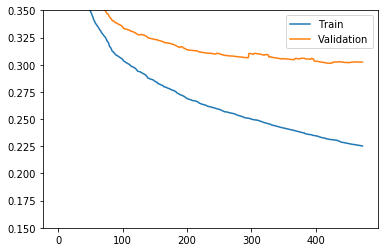

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

results = model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']
epoch = range(len(train_rmse))
plt.plot(epoch, train_rmse, label='Train')
plt.plot(epoch, val_rmse, label='Validation')
plt.ylim(0.15,0.35)
plt.legend();

In [28]:
# Make pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))

# Fit

pipeline.fit(x_train, y_train_log)

# Validate

y_pred_log = pipeline.predict(x_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

#submission

def generate_submission(estimator, x_test, filename):
    y_pred_log = estimator.predict(x_test)
    y_pred = np.expm1(y_pred_log)  # Convert from log-dollars to dollars
    submission = pd.read_csv(SOURCE + '../sample_submission.csv')
    submission['cost'] = y_pred
    submission.to_csv(filename, index=False)
    
generate_submission(pipeline, x_test, 'submission-03.csv')

Validation Error 0.3309798306548966


In [29]:
from sklearn.model_selection import cross_val_score

k = 3
groups = train['tube_assembly_id']
scores = cross_val_score(pipeline, x_train, y_train_log, cv=k,
                        scoring='neg_mean_squared_error', groups=groups)

print('RMSLE for', k, 'folds:', np.sqrt(-scores))

RMSLE for 3 folds: [0.33346942 0.33459009 0.34711042]


In [33]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_features': uniform(),
    'randomforestregressor__min_samples_leaf': [1, 10, 100]}

search = RandomizedSearchCV(
    pipeline,
    param_distributions = param_distributions,
    n_iter = 100,
    cv = 10,
    scoring = 'neg_mean_squared_error',
    return_train_score = True,
    n_jobs = -1)

search.fit(x_train, y_train_log, groups=groups)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=['tube_assembly_id', 'supplier', 'bracket_pricing', 'material_id', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'component_id_1', 'component_type_id', 'spec1'],
        drop_invariant=False, handle_unknown='impute', impute_missing=Tr...timators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'randomforestregressor__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a28764898>, 'randomforestregressor__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a287649e8>, 'randomforestregressor__min_samples_leaf': [1, 10, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_

In [31]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation RMSLE', np.sqrt(-search.best_score_))

Best hyperparameters {'randomforestregressor__max_features': 0.530250280435943, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__n_estimators': 256}
Cross-validation RMSLE 0.34765102204061443


In [32]:
generate_submission(pipeline, x_test, 'submission.csv')